In [1]:
# import packages
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.express as px
import os
import glob

## Read input

In [6]:
gt = pd.read_csv('input/gtdbtk.bac120.summary.tsv', sep='\t')
gt = gt[['user_genome','classification','fastani_ani','closest_placement_reference','closest_placement_ani']]

gt['domain'] = gt['classification'].str.split(';', expand=True)[0].str.replace(r'd__', '')
gt['phylum'] = gt['classification'].str.split(';', expand=True)[1].str.replace(r'p__', '')
gt['class'] = gt['classification'].str.split(';', expand=True)[2].str.replace(r'c__', '')
gt['order'] = gt['classification'].str.split(';', expand=True)[3].str.replace(r'o__', '')
gt['family'] = gt['classification'].str.split(';', expand=True)[4].str.replace(r'f__', '')
gt['genus'] = gt['classification'].str.split(';', expand=True)[5].str.replace(r'g__', '')
gt['sp'] = gt['classification'].str.split(';', expand=True)[6].str.replace(r's__', '')
gt = gt.drop('classification', axis=1)

gt.tail()


user_genome  fastani_ani closest_placement_reference  \
2252  VZXIHP_metabat.45        95.99             GCA_004554485.1   
2253  VZXIHP_metabat.47        98.65             GCA_017935485.1   
2254  VZXIHP_metabat.71        98.21             GCA_900547645.1   
2255  VZXIHP_vamb.13313        98.08             GCA_905201055.1   
2256  VZXIHP_vamb.28684          NaN             GCA_900761895.1   

      closest_placement_ani    domain          phylum                class  \
2252                  95.99  Bacteria     Bacillota_A           Clostridia   
2253                  98.65  Bacteria  Pseudomonadota  Alphaproteobacteria   
2254                  98.21  Bacteria     Bacillota_A           Clostridia   
2255                  98.08  Bacteria  Pseudomonadota  Gammaproteobacteria   
2256                  82.01  Bacteria     Bacillota_A           Clostridia   

                   order              family          genus  \
2252     Oscillospirales     Ruminococcaceae  Angelakisella   
2253                RF32             CAG-239     MGBC133411   
2254  Christensenellales      Borkfalkiaceae     Gallimonas   
2255     Burkholderiales  Burkholderiaceae_A     Aphodousia   
2256  Christensenellales            HGM11417       HGM11417   

                             sp  
2252  Angelakisella sp004554485  
2253     MGBC133411 sp017935485  
2254         Gallimonas faecium  
2255     Aphodousia sp905201055  
2256

In [36]:
bst = pd.read_excel('input/FINAL_only_the_best_genomes.xlsx')
bst['genome'] = bst['final_genomes'].str.replace(r'.fa', '')
mrg = gt.merge(bst, left_on='user_genome', right_on='genome', how='inner')
mrg.head()

/var/folders/fr/j_4kmkcj6zs6nglntg64jfgr0000gn/T/ipykernel_32292/2377798195.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  bst['genome'] = bst['final_genomes'].str.replace(r'.fa', '')


user_genome  fastani_ani closest_placement_reference  \
0  V00H9L_vamb.216248        97.52             GCA_900764105.1   
1   V010T4_maxbin.052          NaN                         NaN   
2  V010T4_metabat.133        98.97             GCF_003460605.1   
3   V010T4_metabat.15        98.82             GCA_900551915.1   
4  V03HFT_vamb.122948        97.46             GCA_900761685.1   

   closest_placement_ani    domain           phylum             class  \
0                  97.52  Bacteria      Bacillota_A        Clostridia   
1                    NaN  Bacteria      Bacillota_A        Clostridia   
2                  98.97  Bacteria      Bacillota_A        Clostridia   
3                  98.82  Bacteria  Cyanobacteriota  Vampirovibrionia   
4                  97.46  Bacteria      Bacillota_A        Clostridia   

                 order                family       genus  ...  \
0   Christensenellales        Borkfalkiaceae    UBA10281  ...   
1              UBA1212                SIG427      SIG427  ...   
2       Lachnospirales       Lachnospiraceae   Blautia_A  ...   
3  Gastranaerophilales  Gastranaerophilaceae  Scatenecus  ...   
4   Christensenellales        Borkfalkiaceae  Gallimonas  ...   

  secondary_cluster  part completeness contamination strain_heterogeneity  \
0          p6-487_1    p6        96.55          1.72                  0.0   
1          p9-685_1    p9        98.28          0.00                  0.0   
2          p9-471_1    p9        94.83          1.72                  0.0   
3           p9-39_1    p9       100.00          0.00                  0.0   
4          p2-383_1    p2        94.83          0.31                  0.0   

    length     N50 centrality  Bin_qual              genome  
0  2439293  206313   0.971814        HQ  V00H9L_vamb.216248  
1  2472853   81610   0.000000        HQ   V010T4_maxbin.052  
2  3389161   78121   0.000000        HQ  V010T4_metabat.133  
3  2027252  213484   0.989376        HQ   V010T4_metabat.15  
4  1893952  134467   0.965245        HQ  V03HFT_vamb.122948  

[5 rows x 26 columns]

In [35]:
#all = pd.read_excel('input/FINAL_all_bins_all_clusters.xlsx')
clN = all['final_genomes'].value_counts().rename_axis('cluster_genomes').reset_index(name='bin_in_cluster')
clN['cluster_genomes'] = clN['cluster_genomes'].str.replace(r'.fa', '')
clN.head()

/var/folders/fr/j_4kmkcj6zs6nglntg64jfgr0000gn/T/ipykernel_32292/866610877.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  clN['cluster_genomes'] = clN['cluster_genomes'].str.replace(r'.fa', '')


cluster_genomes  bin_in_cluster
0   VMFSOR_vamb.1005            1216
1  VPWQBS_maxbin.016            1083
2    VA3VD0_vamb.678            1032
3  V8BF42_vamb.94156             935
4  VE6LJ7_maxbin.022             879

In [48]:
mrg1 = mrg.merge(clN, left_on='user_genome', right_on='cluster_genomes', how='inner')
mrg1.to_excel('results/FINAL_TABLE.xlsx')

/var/folders/fr/j_4kmkcj6zs6nglntg64jfgr0000gn/T/ipykernel_32292/2017871076.py:2: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.3.1' currently installed).
  mrg1.to_excel('results/FINAL_TABLE.xlsx')


## Visualization

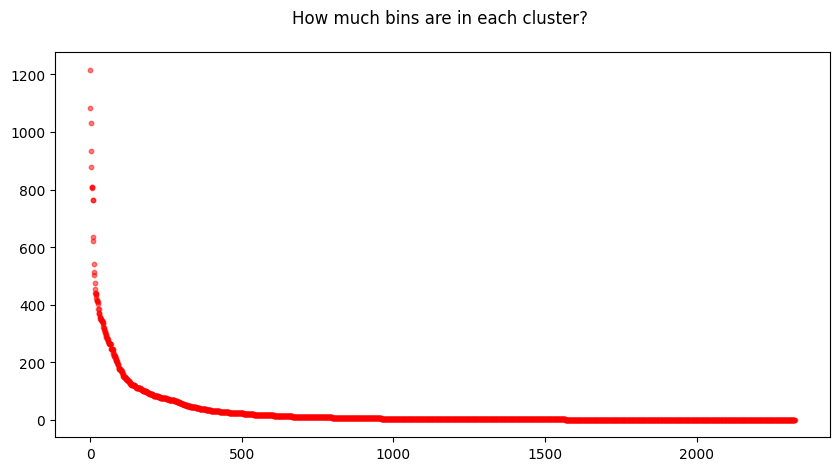

In [46]:
plt.figure(figsize=(10, 5))
plt.scatter(mrg.index, mrg1['bin_in_cluster'], s=10, alpha=0.5, color='red')

#plt.xticks(rotation=90)
#plt.xlabel('Secondary cluster')
#plt.ylabel('Number of bins per cluster')
plt.title('How much bins are in each cluster? \n')

plt.savefig('results/FINAL_clusters.png', dpi=300, bbox_inches='tight')

In [54]:
import plotly.express as px

fig = px.sunburst(
    mrg1,
    path=['phylum', 'class', 'order', 'family'],
    values='bin_in_cluster',
    title="Final CLUSTRS best genome, \n GTDB, release214",
    width=750, 
    height=750
)

fig.write_html("Final_CLUSTRS_best.html")


/Users/ketpantuh/Library/Python/3.8/lib/python/site-packages/plotly/express/_core.py:1574: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/ketpantuh/Library/Python/3.8/lib/python/site-packages/plotly/express/_core.py:1574: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/ketpantuh/Library/Python/3.8/lib/python/site-packages/plotly/express/_core.py:1574: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/ketpantuh/Library/Python/3.8/lib/python/site-packages/plotly/express/_core.py:1574: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/ketpantuh/Library/Python/3.8/lib/python/site-packages/plotly/express/_core.py:1574: Futur

In [65]:
mrg1['phylum'].value_counts()


Bacillota_A          1261
Bacteroidota          341
Bacillota             216
Pseudomonadota        161
Cyanobacteriota        78
Actinomycetota         76
Verrucomicrobiota      58
Bacillota_C            46
Desulfobacterota       30
Campylobacterota       12
Bacillota_B            10
Spirochaetota          10
Elusimicrobiota         8
Fusobacteriota          7
Synergistota            5
Myxococcota             1
Eremiobacterota         1
Bacillota_G             1
Patescibacteria         1
Fibrobacterota          1
Name: phylum, dtype: int64

In [68]:
mrg2 = mrg1[mrg1['phylum'] == 'Pseudomonadota']

fig = px.sunburst(
    mrg2,
    path=['class', 'order', 'family', 'genus', 'sp'],
    values='bin_in_cluster',
    title="Final CLUSTRS best genome, \n GTDB, release214",
    width=750, 
    height=750
)

fig.write_html("taxa_results/Final_CLUSTRS_best_Pseudomonadota.html")
fig.show()

/Users/ketpantuh/Library/Python/3.8/lib/python/site-packages/plotly/express/_core.py:1574: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/ketpantuh/Library/Python/3.8/lib/python/site-packages/plotly/express/_core.py:1574: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/ketpantuh/Library/Python/3.8/lib/python/site-packages/plotly/express/_core.py:1574: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/ketpantuh/Library/Python/3.8/lib/python/site-packages/plotly/express/_core.py:1574: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/ketpantuh/Library/Python/3.8/lib/python/site-packages/plotly/express/_core.py:1574: Futur

In [69]:
mrg3 = mrg1[mrg1['bin_in_cluster'] > 18]

fig = px.sunburst(
    mrg3,
    path=['class', 'order', 'family', 'genus', 'sp'],
    values='bin_in_cluster',
    title="Final CLUSTRS best genome, \n GTDB, release214",
    width=750, 
    height=750
)

fig.write_html("taxa_results/Final_CLUSTRS_best_prev1.html")
fig.show()

/Users/ketpantuh/Library/Python/3.8/lib/python/site-packages/plotly/express/_core.py:1574: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/ketpantuh/Library/Python/3.8/lib/python/site-packages/plotly/express/_core.py:1574: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/ketpantuh/Library/Python/3.8/lib/python/site-packages/plotly/express/_core.py:1574: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/ketpantuh/Library/Python/3.8/lib/python/site-packages/plotly/express/_core.py:1574: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/ketpantuh/Library/Python/3.8/lib/python/site-packages/plotly/express/_core.py:1574: Futur